In [427]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [428]:
# reading companies data into dataframe using latin-1 encoding
#companies = pd.read_csv("C:/Users/Swati/Desktop/UpGrad/Course2/3_investment_assignment/companies.txt", 
                        #delimiter="\t", encoding = 'latin-1')
companies = pd.read_csv("C:/Users/Swati/Desktop/UpGrad/Course2/3_investment_assignment/companies.txt", 
                        delimiter="\t", encoding = 'iso-8859-1')

In [429]:
# permalink is unique identifier of each row, but has mixed characters, let's convert it in lowercase
companies['permalink']=companies['permalink'].apply(lambda x: x.lower())

In [430]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [431]:
#rounds2 = pd.read_csv("C:/Users/Swati/Desktop/UpGrad/Course2/3_investment_assignment/rounds2.csv", encoding = 'latin-1')
rounds2 = pd.read_csv("C:/Users/Swati/Desktop/UpGrad/Course2/3_investment_assignment/rounds2.csv", encoding = 'iso-8859-1')

In [432]:
# companies_permalink is key matching in both df, and to merge it properly let's convert it in lowercase
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x: x.lower())

In [433]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [434]:
# counting unique rows in each column of rounds dataframe
rounds2.nunique()

company_permalink           66370
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [435]:
# counting unique rows in each column of companies dataframe
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [436]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [437]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [438]:
rounds2['company_permalink']=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [439]:
rounds2.company_permalink.head()

0                    /organization/-fame
1                 /organization/-qounter
2                 /organization/-qounter
3    /organization/-the-one-of-them-inc-
4                  /organization/0-6-com
Name: company_permalink, dtype: object

In [440]:
companies['permalink']=companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [441]:
companies.permalink.head()

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
4         /organization/004-technologies
Name: permalink, dtype: object

In [442]:
new = pd.merge(rounds2, companies, how='inner',
                left_on=['company_permalink'], right_on=['permalink'],
                indicator=True)

In [443]:
new.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,both
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,both
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,both
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,both


In [444]:
new.query('_merge != "both"')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge


In [445]:
rounds2.nunique()

company_permalink           66368
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [446]:
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

### Note 
once i cleaned the permalink and company_permalink columns by encoding and decoding, the number of unique rows in rounds2 is reduced by 2, and also on merging, we can see that there was no company in rounds2 whose detail is not present in companies
this is again tested and validated by using excel features and counting unique company_permalink rows

In [447]:
master_frame = pd.merge(rounds2, companies, how='inner',
                left_on=['company_permalink'], right_on=['permalink'])

In [448]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [449]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


### Note
from above cell:  we can see that out of 114949 rows, funding amount field is null for (114949 - 94959 = 19990, i.e 17% of all rows doesn't have funding amount information)
let's first count which investment type has how many rows null and then we will decide if we need to impute the missing values with some method like mean or we can simply ignore these rows

In [450]:
# let's first drop permalink field from master_frame as it we already have company_permalink field 

master_frame = master_frame.drop(['permalink'], axis=1)

In [451]:
# 1. counting after group by for funding type
# 2. counting funding amount null count by funding type

master_frame.funding_round_type.value_counts().sort_index()
#master_frame.funding_round_type.nunique()

angel                     6094
convertible_note          1817
debt_financing            6895
equity_crowdfunding       3257
grant                     2200
non_equity_assistance      191
post_ipo_debt              152
post_ipo_equity            638
private_equity            2285
product_crowdfunding       410
secondary_market            95
seed                     30524
undisclosed               4897
venture                  55494
Name: funding_round_type, dtype: int64

note : venture and seed funding types constitute around 75% of data

In [452]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].agg('count')

funding_round_type
angel                     4860
convertible_note          1447
debt_financing            6682
equity_crowdfunding       1228
grant                     2124
non_equity_assistance       73
post_ipo_debt              152
post_ipo_equity            628
private_equity            1936
product_crowdfunding       386
secondary_market            30
seed                     23603
undisclosed               1582
venture                  50228
Name: raised_amount_usd, dtype: int64

In [453]:
master_frame.raised_amount_usd.isnull().groupby(master_frame['funding_round_type']).sum().astype(int).sort_index()

funding_round_type
angel                    1234
convertible_note          370
debt_financing            213
equity_crowdfunding      2029
grant                      76
non_equity_assistance     118
post_ipo_debt               0
post_ipo_equity            10
private_equity            349
product_crowdfunding       24
secondary_market           65
seed                     6921
undisclosed              3315
venture                  5266
Name: raised_amount_usd, dtype: int32

In [454]:
(master_frame.raised_amount_usd.isnull().groupby(master_frame['funding_round_type']).sum().astype(int).sort_index()/master_frame.funding_round_type.value_counts().sort_index())*100

funding_round_type
angel                    20.249426
convertible_note         20.363236
debt_financing            3.089195
equity_crowdfunding      62.296592
grant                     3.454545
non_equity_assistance    61.780105
post_ipo_debt             0.000000
post_ipo_equity           1.567398
private_equity           15.273523
product_crowdfunding      5.853659
secondary_market         68.421053
seed                     22.673961
undisclosed              67.694507
venture                   9.489314
dtype: float64

Note: there are considerable no. of raised_amount_usd which are null for almost all funding types, hence imputing them with mean of funds raised in that category may result in inaccurate analysis

In [455]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860,958694,7404397,0,150000,400000,1000000,494511992
convertible_note,1447,1453438,8043846,0,78847,272000,1000000,185048285
debt_financing,6682,17043526,280320356,0,330484,1100000,4000000,-2147483648
equity_crowdfunding,1228,538368,1719329,0,7000,100000,395901,27400000
grant,2124,4300576,25587424,0,50000,201684,1700000,750000000
non_equity_assistance,73,411203,1771747,0,25000,60000,125000,15000000
post_ipo_debt,152,168704571,602473804,70000,4000000,19950000,60000000,-2147483648
post_ipo_equity,628,82182493,469188915,77,3764794,12262852,40000000,-2147483648
private_equity,1936,73308593,198113458,0,5000000,20000000,75000000,-2147483648


### Note
as we can see that in most of the funding types, std deviations are pretty large which would mean that data is pretty spread out so instead of using mean, let's use median to impute missing values

In [456]:
#imputing null values with median
master_frame.raised_amount_usd = master_frame.groupby('funding_round_type')['raised_amount_usd'].apply(lambda x: x.fillna(x.median()))

In [457]:
#confirming null value treatment

master_frame.raised_amount_usd.isnull().groupby(master_frame['funding_round_type']).sum().astype(int).sort_index()

funding_round_type
angel                    0
convertible_note         0
debt_financing           0
equity_crowdfunding      0
grant                    0
non_equity_assistance    0
post_ipo_debt            0
post_ipo_equity          0
private_equity           0
product_crowdfunding     0
secondary_market         0
seed                     0
undisclosed              0
venture                  0
Name: raised_amount_usd, dtype: int32

In [458]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,6094,845562,6616035,0,200000,400000,750000,494511992
convertible_note,1817,1212859,7193536,0,100000,272000,685170,185048285
debt_financing,6895,16550999,275969721,0,350000,1100000,3701272,-2147483648
equity_crowdfunding,3257,265279,1076630,0,100000,100000,100000,27400000
grant,2200,4158978,25152517,0,50000,201684,1500000,750000000
non_equity_assistance,191,194229,1104004,0,60000,60000,60000,15000000
post_ipo_debt,152,168704571,602473804,70000,4000000,19950000,60000000,-2147483648
post_ipo_equity,638,81086574,465572682,77,3884781,12262852,40000000,-2147483648
private_equity,2285,65166492,183356299,0,6500000,20000000,62400000,-2147483648


## Table 2.1
Average funding for venture =  11108520;𝐴𝑣𝑒𝑟𝑎𝑔𝑒𝑓𝑢𝑛𝑑𝑖𝑛𝑔𝑓𝑜𝑟𝑎𝑛𝑔𝑒𝑙= 845562; Average funding for seed =  618960;𝐴𝑣𝑒𝑟𝑎𝑔𝑒𝑓𝑢𝑛𝑑𝑖𝑛𝑔𝑓𝑜𝑟𝑝𝑟𝑖𝑣𝑎𝑡𝑒𝑒𝑞𝑢𝑖𝑡𝑦= 65166492

note this doesn't changes our conclusion that Venture type startups fit into funding profile of Spark Funds. Also,since the business objective is not to chose a startup but to suggest the right investment type, english speaking country based startup, and sector hence imputing NAN with median by funding type could be a fare assumption on our part

In [459]:
#let's take a copy of master_frame by filtering only for venture type

df1 = master_frame.copy()

In [460]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [461]:
df1['new'] = 'new'

In [462]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,new
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,new
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,new
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,new
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,new
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,new


In [463]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [464]:
df1.nunique()

company_permalink           66368
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22099
name                        66102
homepage_url                61191
category_list               27296
status                          4
country_code                  137
state_code                    311
region                       1092
city                         5111
founded_at                   3978
new                             1
dtype: int64

In [465]:
# let's ilter df1 only for chosen investment type = venture

df1 = df1[df1['funding_round_type'] == 'venture']

In [466]:
df1.nunique()

company_permalink          32468
funding_round_permalink    55494
funding_round_type             1
funding_round_code             8
funded_at                   4553
raised_amount_usd          12549
name                       32407
homepage_url               30099
category_list              11634
status                         4
country_code                 103
state_code                   264
region                       831
city                        3175
founded_at                  2251
new                            1
dtype: int64

so there are 103 unique country where venture funds have invested

## Country analysis¶
now let's get the data related to english speaking countries for analysis

In [467]:
#loding english speaking cuntry list 
## --https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

eng_country = pd.read_excel("C:/Users/Swati/Desktop/UpGrad/Course2/3_investment_assignment/english_speaking_countries.xlsx")

In [468]:
eng_country.head()

,Country,Region,Population
0,Australia,Oceania,25019600
1,New Zealand,Oceania,4893830
2,United Kingdom,Europe,66040229
3,United States,North America/Oceania,325719178
4,Antigua and Barbuda[2],Caribbean,85000


In [469]:
eng_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
Country       109 non-null object
Region        109 non-null object
Population    105 non-null object
dtypes: object(3)
memory usage: 2.7+ KB


In [470]:
# loading coutry to coutry code mapping  - https://www.worldatlas.com/aatlas/ctycodes.htm

country_code = pd.read_excel("C:/Users/Swati/Desktop/UpGrad/Course2/3_investment_assignment/country_code_mapping.xlsx")

In [471]:
print(country_code.head())
print(country_code.info())

          COUNTRY A2 (ISO) A3 (UN)  NUM (UN) DIALING CODE
0     Afghanistan       AF     AFG         4           93
1         Albania       AL     ALB         8          355
2         Algeria       DZ     DZA        12          213
3  American Samoa       AS     ASM        16        1-684
4         Andorra       AD     AND        20          376
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
COUNTRY         248 non-null object
A2 (ISO)        247 non-null object
A3 (UN)         248 non-null object
NUM (UN)        248 non-null int64
DIALING CODE    248 non-null object
dtypes: int64(1), object(4)
memory usage: 9.8+ KB
None


### Note
in our master_frame dataframe we have coutry_code (3 character code) so filter out which of the startups are in english speaking countries we need to merge df, eng_country, and country_code dataframes
in order to get a A3(UN) code against each english speaking coutry we first need to clean eng_country dataframe first as lot of names have [#number] as suffix which needs to be removed for merging

In [472]:
eng_country['Country'] = eng_country['Country'].str.replace(r"[", '')

In [473]:
eng_country['Country'] = eng_country['Country'].str.replace(r"]", '')

In [474]:
eng_country['Country'] = eng_country['Country'].str.replace(r"[0-9]", '')

In [475]:
eng_country.Country = eng_country.Country.str.strip()

In [476]:
eng_country.Country = eng_country.Country.str.lower()

In [477]:
eng_country.head()

,Country,Region,Population
0,australia,Oceania,25019600
1,new zealand,Oceania,4893830
2,united kingdom,Europe,66040229
3,united states,North America/Oceania,325719178
4,antigua and barbuda,Caribbean,85000


In [478]:
eng_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
Country       109 non-null object
Region        109 non-null object
Population    105 non-null object
dtypes: object(3)
memory usage: 2.7+ KB


In [479]:
#renaming the code column

country_code = country_code.rename(columns={"COUNTRY":"Country","A3 (UN)": "country_code"})

In [480]:
country_code.Country = country_code.Country.str.lower()

In [481]:
country_code.Country = country_code.Country.str.strip()

In [482]:
country_code.head()

,Country,A2 (ISO),country_code,NUM (UN),DIALING CODE
0,afghanistan,AF,AFG,4,93
1,albania,AL,ALB,8,355
2,algeria,DZ,DZA,12,213
3,american samoa,AS,ASM,16,1-684
4,andorra,AD,AND,20,376


In [483]:
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
Country         248 non-null object
A2 (ISO)        247 non-null object
country_code    248 non-null object
NUM (UN)        248 non-null int64
DIALING CODE    248 non-null object
dtypes: int64(1), object(4)
memory usage: 9.8+ KB


In [484]:
#merging eng speaking country and country codes

eng_country2 = pd.merge(eng_country, country_code, how='left', on='Country')

In [485]:
eng_country2.head()

,Country,Region,Population,A2 (ISO),country_code,NUM (UN),DIALING CODE
0,australia,Oceania,25019600,AU,AUS,36.0,61
1,new zealand,Oceania,4893830,NZ,NZL,554.0,64
2,united kingdom,Europe,66040229,GB,GBR,826.0,44
3,united states,North America/Oceania,325719178,US,USA,840.0,1
4,antigua and barbuda,Caribbean,85000,AG,ATG,28.0,1-268


In [486]:
eng_country2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 7 columns):
Country         109 non-null object
Region          109 non-null object
Population      105 non-null object
A2 (ISO)        93 non-null object
country_code    94 non-null object
NUM (UN)        94 non-null float64
DIALING CODE    94 non-null object
dtypes: float64(1), object(6)
memory usage: 6.9+ KB


### 
now let's merge eng_country2 with df1 dataframe to know which venture funds investments made in startups in english speaking countries



In [487]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,new
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,new
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,new
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,new
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,new
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,new


In [488]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 16 columns):
company_permalink          55494 non-null object
funding_round_permalink    55494 non-null object
funding_round_type         55494 non-null object
funding_round_code         30985 non-null object
funded_at                  55494 non-null object
raised_amount_usd          55494 non-null float64
name                       55494 non-null object
homepage_url               52549 non-null object
category_list              54362 non-null object
status                     55494 non-null object
country_code               52619 non-null object
state_code                 51698 non-null object
region                     51940 non-null object
city                       51940 non-null object
founded_at                 44303 non-null object
new                        55494 non-null object
dtypes: float64(1), object(15)
memory usage: 7.2+ MB


note: there are (54494 - 52619 = 1875 NAN in coutrycode, we need to drop these as we can't guess them

In [489]:
# dropping null country code rows

df1 = df1.dropna(axis=0, subset= ['country_code'])

In [490]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52619 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          52619 non-null object
funding_round_permalink    52619 non-null object
funding_round_type         52619 non-null object
funding_round_code         29442 non-null object
funded_at                  52619 non-null object
raised_amount_usd          52619 non-null float64
name                       52619 non-null object
homepage_url               50301 non-null object
category_list              52024 non-null object
status                     52619 non-null object
country_code               52619 non-null object
state_code                 51698 non-null object
region                     51940 non-null object
city                       51940 non-null object
founded_at                 42953 non-null object
new                        52619 non-null object
dtypes: float64(1), object(15)
memory usage: 6.8+ MB


In [491]:
# now that we removed rows with null coutry code, let's merge the two dataframes

df1 = pd.merge(df1, eng_country2, how='inner', on='country_code')

In [492]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,region,city,founded_at,new,Country,Region,Population,A2 (ISO),NUM (UN),DIALING CODE
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,...,Mumbai,Mumbai,NaN,new,india,Asia,1247540000,IN,356.0,91
1,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,5000000.0,1000Lookz,http://1000lookz.com,Beauty,operating,...,Chennai,Chennai,01-01-2008,new,india,Asia,1247540000,IN,356.0,91
2,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,...,New Delhi,Gurgaon,01-06-2012,new,india,Asia,1247540000,IN,356.0,91
3,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,...,Bangalore,Bangalore,01-01-2001,new,india,Asia,1247540000,IN,356.0,91
4,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,...,Bangalore,Bangalore,01-06-2006,new,india,Asia,1247540000,IN,356.0,91


In [493]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45101 entries, 0 to 45100
Data columns (total 22 columns):
company_permalink          45101 non-null object
funding_round_permalink    45101 non-null object
funding_round_type         45101 non-null object
funding_round_code         24436 non-null object
funded_at                  45101 non-null object
raised_amount_usd          45101 non-null float64
name                       45101 non-null object
homepage_url               43016 non-null object
category_list              44663 non-null object
status                     45101 non-null object
country_code               45101 non-null object
state_code                 44514 non-null object
region                     44826 non-null object
city                       44826 non-null object
founded_at                 37533 non-null object
new                        45101 non-null object
Country                    45101 non-null object
Region                     45101 non-null object
Populati

In [494]:
#dropping a few unwanted columns

df1 = df1.drop(axis=1, columns = ['Region', 'Population','A2 (ISO)','NUM (UN)','DIALING CODE'])

In [495]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,new,Country
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,new,india
1,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,5000000.0,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,new,india
2,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,new,india
3,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,new,india
4,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,new,india


In [496]:
#dropping a few unwanted columns

df1 = df1.drop(axis=1, columns = ['new'])

In [94]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,india
1,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,5000000.0,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,india
2,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,india
3,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,india
4,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,india


In [95]:
# let's groupby country_code and aggr on sum of raised_amount 
df2 = df1.groupby('country_code', as_index=False).agg({'funding_round_type':'first','category_list':'first', 'Country':'first','raised_amount_usd':'sum'})

In [96]:
df2.head()

,country_code,funding_round_type,category_list,Country,raised_amount_usd
0,ARE,venture,Hospitals,united arab emirates,3.826175e+08
1,AUS,venture,Biotechnology,australia,1.412935e+09
2,BGD,venture,Freelancers|Internet|Marketplaces,bangladesh,1.200200e+07
3,BHR,venture,Apps|Mobile|News|Sports|Television,bahrain,5.000000e+06
4,BMU,venture,Finance,bermuda,2.938000e+08


In [97]:
top9 = df2.sort_values('raised_amount_usd', ascending=False).head(9)

In [497]:
top9

,country_code,funding_round_type,category_list,Country,raised_amount_usd
36,USA,venture,Application Platforms|Real Time|Social Network...,united states,4.336758e+11
11,GBR,venture,Education,united kingdom,2.148563e+10
16,IND,venture,Media,india,1.523186e+10
6,CAN,venture,Biotechnology,canada,1.003333e+10
18,ISR,venture,Advertising|Business Development,israel,7.477515e+09
33,SGP,venture,Mobile,singapore,3.128918e+09
17,IRL,venture,Mobile,ireland,1.931131e+09
1,AUS,venture,Biotechnology,australia,1.412935e+09
26,MYS,venture,Online Travel|Service Providers|Travel & Tourism,malaysia,9.130588e+08


### Table 3.1
so top9 dataframe captures top 9 countries for venture type investment for all sectors aggregated in sorted(descending order) on raised amount in USD

First = USA; Second = GBR; Third = IND

### checkpoint 4 begins

In [498]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,india
1,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,5000000.0,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,india
2,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,india
3,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,india
4,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,india


In [499]:
new = df1['category_list'].str.split("|",n=1,expand = True)

In [500]:
new.head()

,0,1
0,Media,None
1,Beauty,None
2,E-Commerce,None
3,EdTech,Education|Systems
4,3D,Mobile


In [501]:
df1['primary_sector']=new[0]

now our df1 (copy of master frame) has primary sector listed

In [502]:
# stripping primary_sector of any whitespace adn then converting it lowerspace

df1['primary_sector'] = df1.primary_sector.str.lower()
df1.primary_sector = df1.primary_sector.str.strip()

In [503]:
df1.primary_sector.head()

0         media
1        beauty
2    e-commerce
3        edtech
4            3d
Name: primary_sector, dtype: object

In [504]:
## now our dataframe is ready to be merged with mapping data, so let's load mapping data

mapping = pd.read_csv("C:/Users/Swati/Desktop/UpGrad/Course2/3_investment_assignment/mapping.csv")

In [505]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [506]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [507]:
## dropping the only null value row for category_list
mapping = mapping.dropna(axis=0, subset= ['category_list'])

In [508]:
# stripping category_list of mapping dataframe, removing any whitespace 
## adn then converting it lowerspace and also renaming it as primary_sector
mapping = mapping.rename(columns={"category_list":"primary_sector"})
mapping['primary_sector'] = mapping.primary_sector.str.lower()
mapping['primary_sector'] = mapping.primary_sector.str.strip()

In [509]:
mapping.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [510]:
#mapping.loc[mapping['Automotive & Sports']==1,'main_sector'] = 'Automotive & Sports'
#mapping.loc[mapping['Blanks']==1,'main_sector'] = 'Blanks'
#mapping.loc[mapping['Cleantech / Semiconductors']==1,'main_sector'] = 'Cleantech / Semiconductors'
#mapping.loc[mapping['Entertainment']==1,'main_sector'] = 'Entertainment'
#mapping.loc[mapping['Health']==1,'main_sector'] = 'Health'
#mapping.loc[mapping['Manufacturing']==1,'main_sector'] = 'Manufacturing'
#mapping.loc[mapping['News, Search and Messaging']==1,'main_sector'] = 'News, Search and Messaging'
#mapping.loc[mapping['Others']==1,'main_sector'] = 'Others'
#mapping.loc[mapping['Social, Finance, Analytics, Advertising']==1,'main_sector'] = 'Social, Finance, Analytics, Advertising'

In [511]:
mapping['main_sector']=pd.get_dummies(mapping).idxmax(1)

In [512]:
mapping.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3d,0,0,0,0,0,1,0,0,0,Manufacturing
2,3d printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3d technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,active lifestyle,0,0,0,0,1,0,0,0,0,Health


In [513]:
mapping_reformed = mapping[['primary_sector','main_sector']]

In [514]:
mapping_reformed.head()

,primary_sector,main_sector
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"
5,active lifestyle,Health


In [515]:
df1 = pd.merge(df1,mapping_reformed, how='inner', on = 'primary_sector')

In [516]:
df1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,india,media,Entertainment
1,/organization/manas-informatics,/funding-round/719e50301803d3918ffa558fc877e41c,venture,NaN,02-02-2008,160000.0,Manas Informatic,http://www.topnews.in,Media|News,operating,IND,23,Mohali,Mohali,05-05-2007,india,media,Entertainment
2,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,united states,media,Entertainment
3,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,united states,media,Entertainment
4,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,united states,media,Entertainment


In [517]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41601 entries, 0 to 41600
Data columns (total 18 columns):
company_permalink          41601 non-null object
funding_round_permalink    41601 non-null object
funding_round_type         41601 non-null object
funding_round_code         22369 non-null object
funded_at                  41601 non-null object
raised_amount_usd          41601 non-null float64
name                       41601 non-null object
homepage_url               39678 non-null object
category_list              41601 non-null object
status                     41601 non-null object
country_code               41601 non-null object
state_code                 41067 non-null object
region                     41337 non-null object
city                       41337 non-null object
founded_at                 34676 non-null object
Country                    41601 non-null object
primary_sector             41601 non-null object
main_sector                41601 non-null object
dtypes: 

### Checkpoint 4 ends here
df1 (copy of master_frame) thus, is the final dataframe that has rows only for chosen investment funding type (venture), only english speaking country based startups, and their primary_sector mapped to a main_sector

### Checkpoint 5 Starts

In [518]:
top9.head()

,country_code,funding_round_type,category_list,Country,raised_amount_usd
36,USA,venture,Application Platforms|Real Time|Social Network...,united states,4.336758e+11
11,GBR,venture,Education,united kingdom,2.148563e+10
16,IND,venture,Media,india,1.523186e+10
6,CAN,venture,Biotechnology,canada,1.003333e+10
18,ISR,venture,Advertising|Business Development,israel,7.477515e+09


from top9 dataframe we know that top 3 countries are USA, GBR, and IND

In [519]:
# filtering final_df for top 3 countries

final_df= df1[(df1.country_code == 'USA') | (df1.country_code == 'GBR') | (df1.country_code =='IND')]

In [520]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38431 entries, 0 to 41574
Data columns (total 18 columns):
company_permalink          38431 non-null object
funding_round_permalink    38431 non-null object
funding_round_type         38431 non-null object
funding_round_code         20669 non-null object
funded_at                  38431 non-null object
raised_amount_usd          38431 non-null float64
name                       38431 non-null object
homepage_url               36622 non-null object
category_list              38431 non-null object
status                     38431 non-null object
country_code               38431 non-null object
state_code                 38353 non-null object
region                     38262 non-null object
city                       38262 non-null object
founded_at                 32085 non-null object
Country                    38431 non-null object
primary_sector             38431 non-null object
main_sector                38431 non-null object
dtypes: 

In [521]:
#filtering for raised amount between 5 -15 mil

final_df = final_df[(final_df.raised_amount_usd >= 5000000) & (final_df.raised_amount_usd <= 15000000)]

In [522]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14269 entries, 0 to 41574
Data columns (total 18 columns):
company_permalink          14269 non-null object
funding_round_permalink    14269 non-null object
funding_round_type         14269 non-null object
funding_round_code         9691 non-null object
funded_at                  14269 non-null object
raised_amount_usd          14269 non-null float64
name                       14269 non-null object
homepage_url               13611 non-null object
category_list              14269 non-null object
status                     14269 non-null object
country_code               14269 non-null object
state_code                 14246 non-null object
region                     14216 non-null object
city                       14216 non-null object
founded_at                 12063 non-null object
Country                    14269 non-null object
primary_sector             14269 non-null object
main_sector                14269 non-null object
dtypes: f

## Now, let's create country specific dataframes

In [523]:
D1 = final_df[final_df.country_code == 'USA']
D2 = final_df[final_df.country_code == 'GBR']
D3 = final_df[final_df.country_code == 'IND']

In [524]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector
2,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,united states,media,Entertainment
12,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,united states,media,Entertainment
18,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,united states,media,Entertainment
19,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,united states,media,Entertainment
22,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,united states,media,Entertainment


In [525]:
## Total Sum of Investments(count)

print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

13044
781
444


In [526]:
# Total amount of investment (USD)

print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

109136524549.0
6048704358.0
3408537552.0


In [527]:
D1.groupby('main_sector', as_index=False).agg({'company_permalink':'first','funding_round_permalink':'first',
                                               'funding_round_type':'first','funding_round_code':'first', 'funded_at':'first',
                                               'name':'first','homepage_url':'first', 'category_list':'first', 'status':'first', 
                                               'country_code':'first', 'state_code':'first','region':'first', 'city':'first', 
                                               'founded_at':'first', 'Country':'first', 'primary_sector':'first',
                                               'raised_amount_usd':['count','sum']})

main_sector              company_permalink  \
                                                                    first   
0                      Automotive & Sports          /organization/airware   
1               Cleantech / Semiconductors        /organization/arborwind   
2                            Entertainment  /organization/all-def-digital   
3                                   Health   /organization/alpha-moda-lab   
4                            Manufacturing        /organization/accompany   
5               News, Search and Messaging  /organization/1000museums-com   
6                                   Others          /organization/1stdibs   
7  Social, Finance, Analytics, Advertising  /organization/acacia-research   

                           funding_round_permalink funding_round_type  \
                                             first              first   
0  /funding-round/ff5ef44d01bb63a164dffa1b5209390f            venture   
1  /funding-round/cb8f10671eaa96ab8f6496ffc511c6ae            venture   
2  /funding-round/452a2342fe720285c3b92e9bd927d9ba            venture   
3  /funding-round/790b1e16730d30d8acc3fb593db06ba0            venture   
4  /funding-round/5487aebe83d68e93df681fd2af148f3e            venture   
5  /funding-round/adf2f3272af9f552b87e01f10f0b9234            venture   
6  /funding-round/292b074d073fdd9c7e9d8f372c3aa5f6            venture   
7  /funding-round/5d02a1bc958b41cf044934c5fd2ca9da            venture   

  funding_round_code   funded_at             name  \
               first       first            first   
0                  A  15-05-2013          Airware   
1                  A  20-06-2011        ArborWind   
2                  A  06-08-2014  All Def Digital   
3                  A  29-04-2015   Alpha Moda Lab   
4                  A  16-06-2014        Accompany   
5                  G  01-02-2014  1000museums.com   
6                  C  24-01-2014          1stdibs   
7                  C  22-11-1999  Acacia Research   

                    homepage_url  \
                           first   
0             http://airware.com   
1      http://www.arborwind.com/   
2       http://alldefdigital.com   
3         http://www.alpha.moda/   
4      https://www.accompany.com   
5     http://www.1000museums.com   
6         http://www.1stdibs.com   
7  http://www.acaciaresearch.com   

                                       category_list     status country_code  \
                                               first      first        first   
0      Aerospace|Drones|Enterprise Software|Robotics  operating          USA   
1                Energy|Industrial|Natural Resources  operating          USA   
2                                              Media  operating          USA   
3                             Beauty|Cosmetics|Women  operating          USA   
4                         3D|Social Media|Technology  operating          USA   
5                                        Curated Web  operating          USA   
6                                         E-Commerce  operating          USA   
7  Business Services|Intellectual Asset Managemen...        ipo          USA   

  state_code         region           city  founded_at        Country  \
       first          first          first       first          first   
0         CA    SF Bay Area  San Francisco  01-05-2011  united states   
1         MI        Detroit      Ann Arbor  01-01-1992  united states   
2         CA    Los Angeles    Los Angeles  01-01-2012  united states   
3         CA    SF Bay Area      Palo Alto  01-01-2005  united states   
4         CA    SF Bay Area      Los Altos  01-01-2013  united states   
5         MA     MA - Other          Lenox  01-01-2008  united states   
6         NY  New York City       New York  01-01-2001  united states   
7         CA        Anaheim  Newport Beach  01-01-1993  united states   

      primary_sector raised_amount_usd                
               first             count           s

In [528]:
D2.groupby('main_sector', as_index=False).agg({'company_permalink':'first','funding_round_permalink':'first',
                                               'funding_round_type':'first','funding_round_code':'first', 'funded_at':'first',
                                               'name':'first','homepage_url':'first', 'category_list':'first', 'status':'first', 
                                               'country_code':'first', 'state_code':'first','region':'first', 'city':'first', 
                                               'founded_at':'first', 'Country':'first', 'primary_sector':'first',
                                               'raised_amount_usd':['count','sum']})

main_sector                 company_permalink  \
                                                                       first   
0                      Automotive & Sports           /organization/autoquake   
1               Cleantech / Semiconductors          /organization/antech-ltd   
2                            Entertainment               /organization/90min   
3                                   Health  /organization/latestinbeauty-com   
4                            Manufacturing              /organization/mydeco   
5               News, Search and Messaging            /organization/allpeers   
6                                   Others              /organization/achica   
7  Social, Finance, Analytics, Advertising      /organization/bigballs-media   

                           funding_round_permalink funding_round_type  \
                                             first              first   
0  /funding-round/067d143de46ec298cfa1893682f9911a            venture   
1  /funding-round/795b4ece377a628da7f95ffd896d08f3            venture   
2  /funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6            venture   
3  /funding-round/1c6c730928fc062412b7e852fb16b771            venture   
4  /funding-round/5e61f3bc3ee671466a780e2d33b1a97b            venture   
5  /funding-round/cbc8fb6c27e73361f6b4a658a063c396            venture   
6  /funding-round/24ae6ea0872f81214469f325ab7826bf            venture   
7  /funding-round/d2a44552b681cd02c1a6570e774b4a96            venture   

  funding_round_code   funded_at                name  \
               first       first               first   
0                  B  11-05-2008           Autoquake   
1                  B  01-01-2013          AnTech Ltd   
2                  A  06-10-2015               90min   
3                  D  01-01-2011  LatestinBeauty.com   
4                  A  01-08-2008              mydeco   
5                  A  01-03-2006            AllPeers   
6                  C  01-07-2014              ACHICA   
7                  A  12-10-2015      Bigballs Media   

                                        homepage_url  \
                                               first   
0                           http://www.autoquake.com   
1                            http://www.antech.co.uk   
2                               http://www.90min.com   
3                     http://www.latestinbeauty.com/   
4                                  http://mydeco.com   
5  http://www.techcrunch.com/2008/03/03/much-hype...   
6                              http://www.achica.com   
7                    http://www.bigballs.media/#home   

                                       category_list     status country_code  \
                                               first      first        first   
0  Automotive|Cars|E-Commerce|Insurance|Internet|...   acquired          GBR   
1                                     Energy|Gas|Oil  operating          GBR   
2                Media|News|Publishing|Soccer|Sports  operating          GBR   
3                                             Beauty  operating          GBR   
4            3D|Curated Web|E-Commerce|Home & Garden   acquired          GBR   
5                                        Curated Web     closed          GBR   
6  E-Commerce|Gift Card|Home & Garden|Kids|Lifest...  operating          GBR   
7                     Business Services|Media|Sports  operating          GBR   

  state_code  region    city  founded_at         Country     primary_sector  \
       first   first   first       first           first              first   
0         H9  London  London  07-08-2005  united kingdom         automotive   
1         D4  Exeter  Exeter  01-01-1992  united kingdom             energy   
2         H9  London  London  01-01-2011  united kingdom              media   
3         H9  London  London  14-02-2008  united kingdom             beauty   
4         H9  London  London  01-02-2007  united kingdom                 3d   
5         K2  London  O

In [529]:
D3.groupby('main_sector', as_index=False).agg({'company_permalink':'first','funding_round_permalink':'first',
                                               'funding_round_type':'first','funding_round_code':'first', 'funded_at':'first',
                                               'name':'first','homepage_url':'first', 'category_list':'first', 'status':'first', 
                                               'country_code':'first', 'state_code':'first','region':'first', 'city':'first', 
                                               'founded_at':'first', 'Country':'first', 'primary_sector':'first',
                                               'raised_amount_usd':['count','sum']})

main_sector  \
                                             
0                      Automotive & Sports   
1               Cleantech / Semiconductors   
2                            Entertainment   
3                                   Health   
4                            Manufacturing   
5               News, Search and Messaging   
6                                   Others   
7  Social, Finance, Analytics, Advertising   

                            company_permalink  \
                                        first   
0             /organization/mistral-solutions   
1              /organization/attero-recycling   
2                         /organization/-fame   
3                     /organization/1000lookz   
4            /organization/dixon-technologies   
5                      /organization/appointy   
6              /organization/21diamonds-india   
7  /organization/abhinav-outsourcings-pvt-ltd   

                           funding_round_permalink funding_round_type  \
                                             first              first   
0  /funding-round/4688f3f8860d92330aa64f6f6aa0dd39            venture   
1  /funding-round/9a6defe462ba6ead2ac67bc1018da77c            venture   
2  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
3  /funding-round/e07f6e580046d00c7aeb33fafb9d90a3            venture   
4  /funding-round/4706b97ec7264fc01c951a6c0c8de6b9            venture   
5  /funding-round/b4f3567386b3a60d34255813bba7559a            venture   
6  /funding-round/6de7ffef8091ba9f33821f4b861f434a            venture   
7  /funding-round/e53264a913cb88b0bbffa912d0c0bfc6            venture   

  funding_round_code   funded_at                           name  \
               first       first                          first   
0                  B  06-02-2008              Mistral Solutions   
1                  A  21-08-2008                         Attero   
2                  B  05-01-2015                          #fame   
3                  A  22-07-2013                      1000Lookz   
4                  B  28-04-2008             Dixon Technologies   
5                  A  22-01-2014                       Appointy   
6                  C  15-11-2012                     21Diamonds   
7                  A  10-03-2015  Abhinav Outsourcings Pvt. Ltd   

                      homepage_url  \
                             first   
0  http://www.mistralsolutions.com   
1             http://www.attero.in   
2               http://livfame.com   
3             http://1000lookz.com   
4         http://www.dixoninfo.com   
5          http://www.appointy.com   
6         http://www.21diamonds.de   
7          http://www.abhinav.com/   

                                       category_list     status country_code  \
                                               first      first        first   
0  Aerospace|Defense|Embedded Hardware and Softwa...  operating          IND   
1                                   Clean Technology  operating          IND   
2                                              Media  operating          IND   
3                                             Beauty  operating          IND   
4                                Hardware + Software  operating          IND   
5  Online Scheduling|SaaS|Small and Medium Busine...  operating          IND   
6                                         E-Commerce  operating          IND   
7                      Business Services|Outsourcing  operating          IND   

  state_code     region       city  founded_at Country       primary_sector  \
       first      first      first       first   first                first   
0         19  Bangalore  Bangalore  01-01-1997   india            aerospace   
1         36  New Delhi      Noida  01-01-2007   india     clean technology   
2         16     Mumbai     Mumbai  01-01-2008   india                media   
3         25    Chennai    Chennai  01-01-2008   india               beauty   
4         36  New Del

### Plots for the CIO consumption

In [133]:
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [134]:
df1.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,india,media,Entertainment
1,/organization/manas-informatics,/funding-round/719e50301803d3918ffa558fc877e41c,venture,NaN,02-02-2008,160000.0,Manas Informatic,http://www.topnews.in,Media|News,operating,IND,23,Mohali,Mohali,05-05-2007,india,media,Entertainment
2,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,united states,media,Entertainment


In [135]:
top9.head()

,country_code,funding_round_type,category_list,Country,raised_amount_usd
36,USA,venture,Application Platforms|Real Time|Social Network...,united states,4.336758e+11
11,GBR,venture,Education,united kingdom,2.148563e+10
16,IND,venture,Media,india,1.523186e+10
6,CAN,venture,Biotechnology,canada,1.003333e+10
18,ISR,venture,Advertising|Business Development,israel,7.477515e+09


In [136]:
final_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,india,media,Entertainment
2,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,united states,media,Entertainment
12,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,united states,media,Entertainment
18,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,united states,media,Entertainment
19,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,united states,media,Entertainment


In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
# set seaborn theme if you prefer
sns.set(style="darkgrid")

A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [203]:
df_plot1 = master_frame.groupby('funding_round_type', as_index=False).agg({'raised_amount_usd':"mean"})

In [204]:
df_plot1

,funding_round_type,raised_amount_usd
0,angel,8.455620e+05
1,convertible_note,1.212859e+06
2,debt_financing,1.655100e+07
3,equity_crowdfunding,2.652798e+05
4,grant,4.158978e+06
5,non_equity_assistance,1.942294e+05
6,post_ipo_debt,1.687046e+08
7,post_ipo_equity,8.108657e+07
8,private_equity,6.516649e+07
9,product_crowdfunding,1.294104e+06


In [205]:
#filtering above for venture,seed, and private equity 

df_plot1_1 = df_plot1[(df_plot1.funding_round_type == 'venture') | (df_plot1.funding_round_type == 'seed')
                     | (df_plot1.funding_round_type == 'private_equity')]

In [206]:
df_plot1_1

,funding_round_type,raised_amount_usd
8,private_equity,6.516649e+07
11,seed,6.189601e+05
13,venture,1.110852e+07


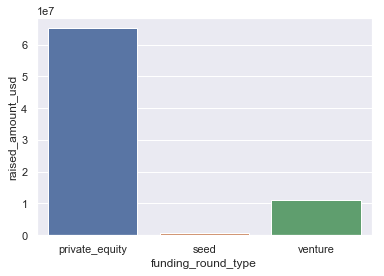

In [208]:
# set figure size for larger figure
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=df_plot1_1)
plt.show()

In [209]:
df_plot1_2 = master_frame[(master_frame.funding_round_type == 'venture') | (master_frame.funding_round_type == 'seed')
                     | (master_frame.funding_round_type == 'private_equity')]

In [210]:
df_plot1_2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


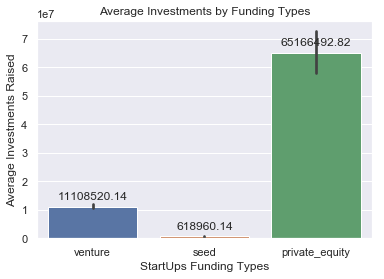

In [254]:
avg_fund_plot = sns.barplot(x=df_plot1_2.funding_round_type, y=df_plot1_2.raised_amount_usd, data=df_plot1_2)
plt.title('Average Investments by Funding Types')
plt.xlabel('StartUps Funding Types')
plt.ylabel('Average Investments Raised')
for p in avg_fund_plot.patches:
    avg_fund_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### Note
Above plot shows average investments by Funding types (Venture, Seed, and Private Equity) and clearly tells that Venture type funding type has average investments falling into 5 -15 million investment bucket that Spark funds are targeting

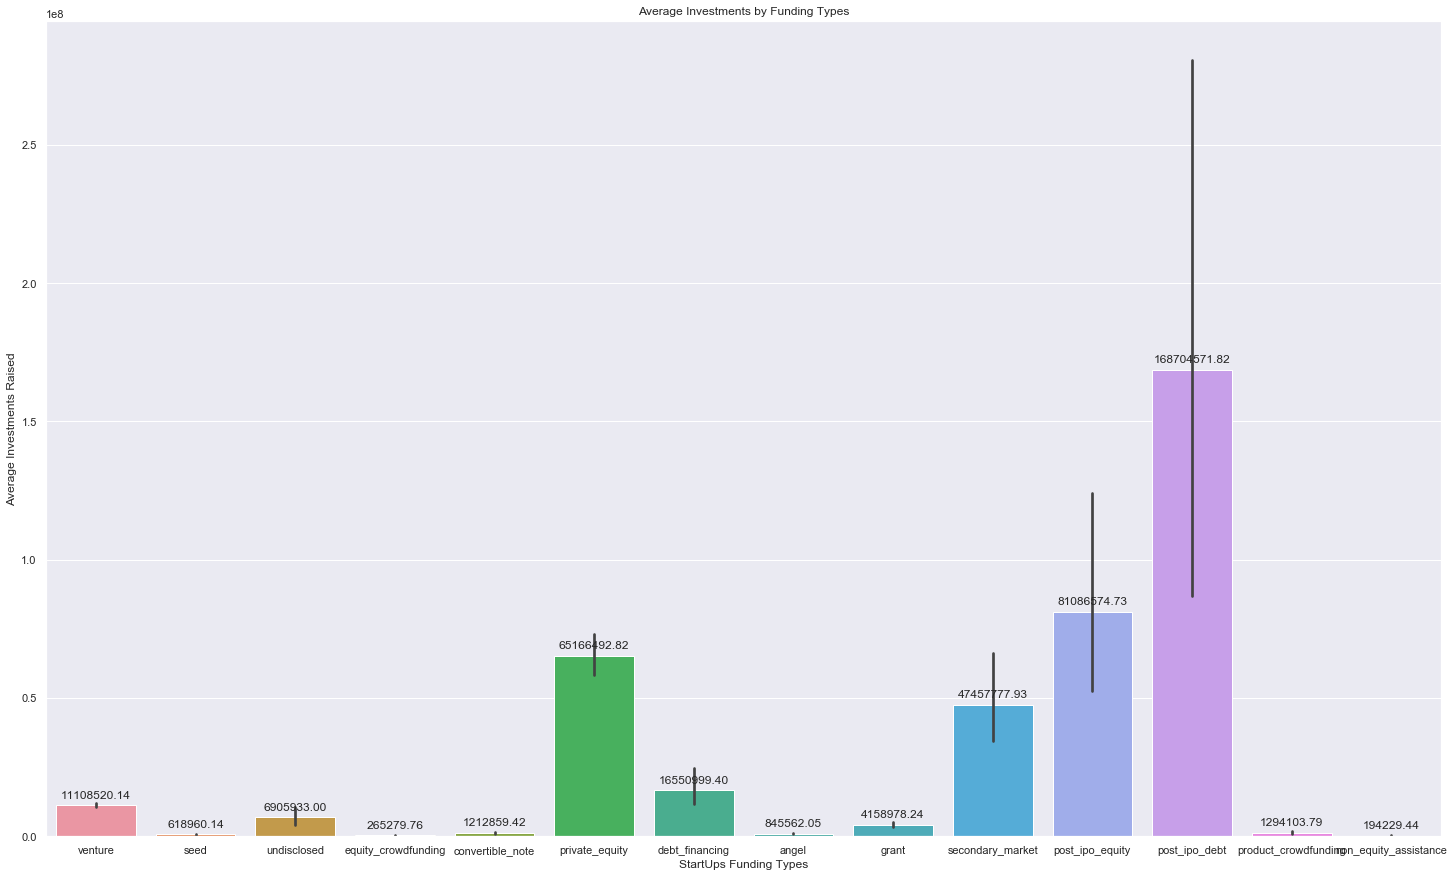

In [253]:
plt.figure(figsize=(25,15))
avg_fund_plot = sns.barplot(x=master_frame.funding_round_type, y=master_frame.raised_amount_usd, data=master_frame)
plt.title('Average Investments by Funding Types')
plt.xlabel('StartUps Funding Types')
plt.ylabel('Average Investments Raised')
for p in avg_fund_plot.patches:
    avg_fund_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### Note
Above plot shows average investments by Funding types and clearly tells that Venture type funding type has average investments falling into 5 -15 million investment bucket that Spark funds are targeting

In [252]:
## top9 dataframe was created after filtering for the preferred funding type = venture, 
## and merging the dataframe with english speaking countries and then saving the data for top9 countries by investment amount

top9

,country_code,funding_round_type,category_list,Country,raised_amount_usd
36,USA,venture,Application Platforms|Real Time|Social Network...,united states,4.336758e+11
11,GBR,venture,Education,united kingdom,2.148563e+10
16,IND,venture,Media,india,1.523186e+10
6,CAN,venture,Biotechnology,canada,1.003333e+10
18,ISR,venture,Advertising|Business Development,israel,7.477515e+09
33,SGP,venture,Mobile,singapore,3.128918e+09
17,IRL,venture,Mobile,ireland,1.931131e+09
1,AUS,venture,Biotechnology,australia,1.412935e+09
26,MYS,venture,Online Travel|Service Providers|Travel & Tourism,malaysia,9.130588e+08


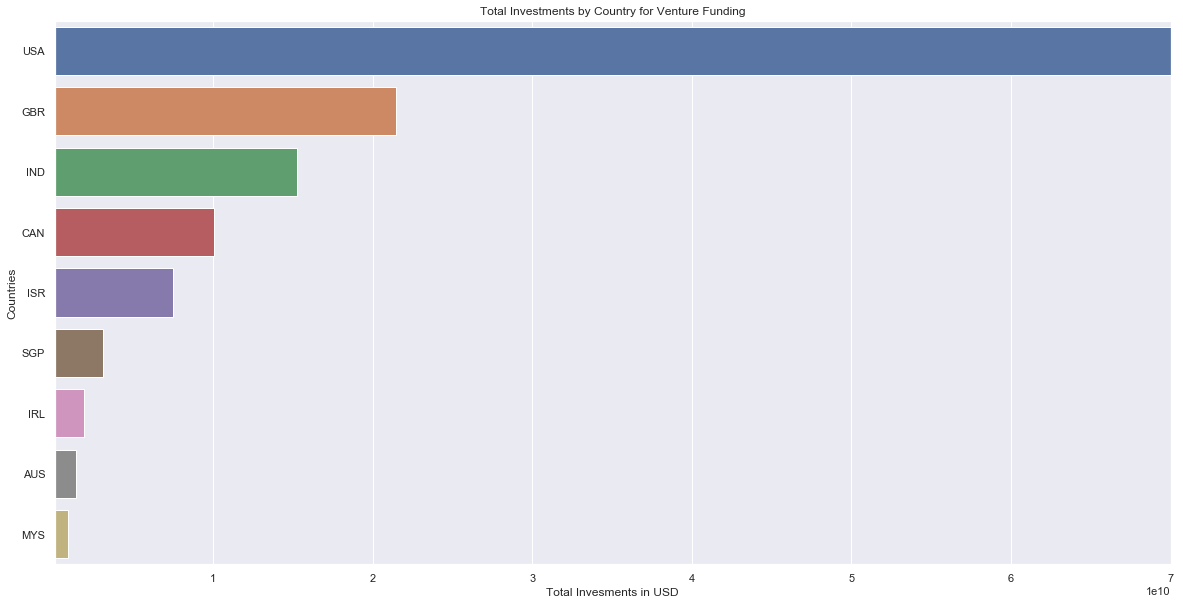

In [298]:
plt.figure(figsize=(20,10))
top9_plot = sns.barplot(x=top9.raised_amount_usd, y=top9.country_code, data=top9, estimator=sum)
plt.title('Total Investments by Country for Venture Funding')
plt.ylabel('Countries')
plt.xlabel('Total Invesments in USD')
top9_plot.set(xlim = (80000000,70000000000))
plt.show()

#### Note

very clearly above plot shows which countries have recieved maximum investments in Venture funding stage in startups

####   Plot 3

for this plot we need to filter final_df for top 3 coutries, it already has data for only venture funding type and english speaking countries 

In [405]:
D_plot = final_df[(final_df.country_code == 'USA') | (final_df.country_code == 'GBR') | (final_df.country_code == 'IND') ]

##### Note
 now D_plot dataframe has data for startups recieving venture funding , set up in english speaking countries, filtered for investments in 5 -15 million funding range, and now we can see a plot for top3 sectors in each of top 3 countries(USA, GBR, IND)

In [406]:
D_plot.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,india,media,Entertainment
2,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,united states,media,Entertainment
12,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,united states,media,Entertainment
18,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,united states,media,Entertainment
19,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,united states,media,Entertainment


In [ ]:
D_plot_grouped2_top3 = D_plot.groupby('country_code', as_index= False).apply(lambda x: x.nlargest(3, 'raised_amount_usd'))

In [398]:
D_plot_grouped = D_plot.groupby(['country_code','main_sector'], as_index=False).agg({'raised_amount_usd':["count"]})

In [399]:
D_plot_grouped

,country_code,main_sector,raised_amount_usd
,,,count
0,GBR,Automotive & Sports,26
1,GBR,Cleantech / Semiconductors,150
2,GBR,Entertainment,78
3,GBR,Health,32
4,GBR,Manufacturing,52
5,GBR,"News, Search and Messaging",97
6,GBR,Others,207
7,GBR,"Social, Finance, Analytics, Advertising",139
8,IND,Automotive & Sports,14


In [402]:
D_plot_grouped_top3 = D_plot_grouped.groupby('country_code', as_index= False).apply(lambda x: x.nlargest(3, ('raised_amount_usd', 'count')))

In [403]:
D_plot_grouped_top3

country_code                              main_sector raised_amount_usd
                                                                       count
0 6           GBR                                   Others               207
  1           GBR               Cleantech / Semiconductors               150
  7           GBR  Social, Finance, Analytics, Advertising               139
1 14          IND                                   Others               157
  13          IND               News, Search and Messaging                76
  15          IND  Social, Finance, Analytics, Advertising                59
2 22          USA                                   Others              3373
  17          USA               Cleantech / Semiconductors              2561
  23          USA  Social, Finance, Analytics, Advertising              2309

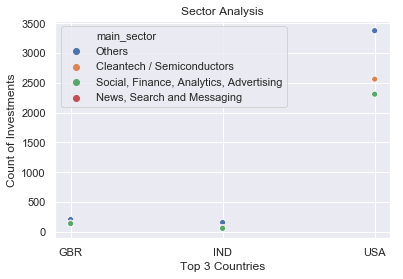

In [530]:
sns.scatterplot(x='country_code', y=('raised_amount_usd','count'), hue='main_sector', data=D_plot_grouped_top3)
plt.title('Sector Analysis')
plt.ylabel('Count of Investments')
plt.xlabel('Top 3 Countries')
plt.show()